<a href="https://colab.research.google.com/github/caltunay/selfIsolation_refreshers/blob/main/4_Latent_Semantic_Analysis_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

In [24]:
df =pd.read_html('https://github.col_book_titles.txt')[0]

In [25]:
df

,0,1
0,NaN,Philosophy of Sex and Love A Reader
1,NaN,"Readings in Judaism, Christianity, and Islam"
2,NaN,Microprocessors Principles and Applications
3,NaN,Bernhard Edouard Fernow: Story of North Americ...
4,NaN,Encyclopedia of Buddhism
...,...,...
2368,NaN,Problems and Solutions on Quantum Mechanics Ma...
2369,NaN,Introduction to Compiler Construction in a Jav...
2370,NaN,Data Structures and Algorithms in Java
2371,NaN,Game Theory: A Nontechnical Introduction to th...


In [ ]:
# process text column
# lower case, tokenize, remove punctuation, lemmatize, remove stopwords

In [32]:
import nltk
nltk.download(['stopwords', 'punkt', 'wordnet'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
from nltk.stem import WordNetLemmatizer
from nltk import tokenize
from nltk.corpus import stopwords

In [39]:
stopwords_ = stopwords.words('english')

In [64]:
def title_cleaner(title_):

    title_ = title_.lower() # lowercased
    title_ = tokenize.word_tokenize(title_)
    title_ = [token for token in title_ if token.isalnum()]
    title_ = [WordNetLemmatizer().lemmatize(token) for token in title_]
    title_ = [token for token in title_ if token not in stopwords_]

    return title_

In [65]:
title_cleaner(df[1][2369])

['introduction', 'compiler', 'construction', 'java', 'world']

In [76]:
df[1].apply(len).sort_values(ascending = False)

2341    202
697     200
2343    199
2350    196
2338    194
       ... 
2023      8
107       7
264       7
229       7
205       7
Name: 1, Length: 2373, dtype: int64

In [77]:
df[1][2341]

'Natural Language Processing And Information Systems 11th International Conference on Applications of Natural Language to Information Systems, Nldb 2006, Klagenfurt, Austria, May 31-june 2, 2006, Proceed'

In [78]:
title_cleaner(df[1][2341])

['natural',
 'language',
 'processing',
 'information',
 'system',
 '11th',
 'international',
 'conference',
 'application',
 'natural',
 'language',
 'information',
 'system',
 'nldb',
 '2006',
 'klagenfurt',
 'austria',
 'may',
 '2',
 '2006',
 'proceed']

In [82]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
tfidf_engine = TfidfVectorizer(analyzer = title_cleaner)

In [94]:
tfidf_x = tfidf_engine.fit_transform(df[1].values)
x_arr = tfidf_x.toarray()

print(x_arr.shape)
print(x_arr)

(2373, 2144)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [96]:
t_svd = TruncatedSVD()
Z = t_svd.fit_transform(x_arr)
Z

array([[ 0.01475249, -0.01612832],
       [ 0.02251228, -0.01377921],
       [ 0.09973267, -0.01155859],
       ...,
       [ 0.07436563, -0.03127163],
       [ 0.17536845, -0.26423457],
       [ 0.03681011,  0.01709827]])

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


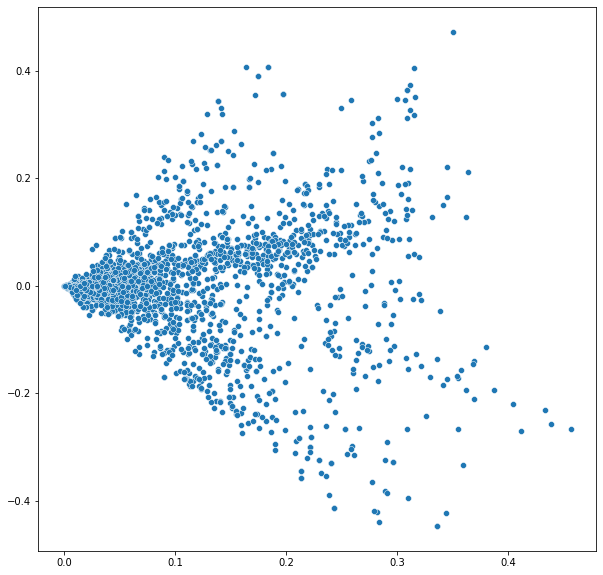

In [105]:
plt.figure(figsize = (10,10))
sns.scatterplot(Z[:,0], Z[:,1])

In [110]:
len(tfidf_engine.get_feature_names())

2144

In [112]:
tfidf_engine.get_params()

{'analyzer': <function __main__.title_cleaner>,
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}